## Wine Quality Prediction using Linear Regression

## Abstract

In this notebook, we have analyzed the UCI's wine dataset and demonstrated how various Predictive models can be built to predict the quality of wine as continuous variable. Understanding which attributes play a key role in making a “quality” wine is essential in driving revenue growth. This opens up many opportunities for wine producers to increase wine sales revenue in the global market. 

Though wine quality is ordinal categorical in the dataset,  we chose to investigate using a model for continuous response knowing that if we use average of ratings from multiple experts for same wine we are likely to get real numbers while each individual rating is an integer.  For example, expert 1 ranks a specific wine as 6 and another expert ranks it 7 then average for the wine is 6.5. However, one short coming that remains is that the rankings are ordinal so 6 is higher than 3 but unlike continuous numbers a score of ordinal 6 is not twice as high as an ordinal ranking of 3.

Predictive model that used all the independent variables as predictors was built first. Detailed study of model summary was done to analyze it's complexity. To improve our understanding of the data and also to boost $R^2$ we had the following 3 ways.
1. Modify the Loss function of Linear Regression : We chose the "Ridge Regression with Regularization" technique to penalize the coefficients that were extreme.
2. Data Transformation : We did Data Normalization using Standard Scaler and Log transformation of skewed variables.
3. Use a higher order Regression such as Polynomial or Support Vector: We opted for Support Vector Regressor on Standardized data whose parameters were selected using GridSearch.

We finally concluded that models that used Regularization with Ridge Regression and SVR may perform better on unseen data as this are simpler than other linear models. We have also shown that a carefully selected GridSearch using Support Vector Regression on Standardized data improved the $R^2$ from 0.32 to 0.44, which is better than publicly available Kaggle kernels.


## Contents

1.	Objective
2.	Introduction to Classification and Regression approaches for Predictive Modeling 
3.	Data Analysis
4.	Predictive Modeling using Linear Regression 
5.	Predictive Modeling using  Ridge Regression with Regularized by scikit learn
6.  Predictive Modeling using Support Vector Machine
7.	Conclusion
8.	References

## 1.	Objective
 
 Objective of this project is to build a predictive model using two different regression approaches (Linear Regression and Support Vector Regression) in order to determine quality of Red and White wine where a lower number denotes low quality, based on the following attributes(independent variables) of Wine:
 1. fixed acidity 
 2. volatile acidity 
 3. citric acid 
 4. residual sugar 
 5. chlorides 
 6. free sulfur dioxide 
 7. total sulfur dioxide 
 8. density 
 9. pH 
 10. sulphates and 
 11. alcohol 
 
The Project also compares outcome of two predictive models and provides key observations on the model with higher prediction rates

## 2.	Introduction to Classification and Regression approaches for Predictive Modeling

There are two types of Machine Learning methods: Classification and Regression.
 
### 2.1	Classification: 
        
Predictive modeling using classification is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). The output variables are often called labels. The mapping function predicts the class or category for a given observation. For example, an email of text can be classified as belonging to one of two classes: "spam" and "not spam".

### 2.2	    Regression:

Predictive modeling using Regression is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y). A continuous output variable is a real-value, such as an integer or floating-point value. These are often quantities, such as amounts and sizes. For example, a house may be predicted to sell for a specific dollar value, perhaps in the range of \\$100,000 to \\$200,000. 

In this study, we will be mainly looking into following types of regression approaches:
   
   
**2.2.1	Linear Regression**:
            
Linear regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, linear regression is estimating the parameters of a linear model. A linear model has a continuous dependent variable. 

Given a dataset of n observations $ \{y_i, x_i \}_{i=1}^n $, each observation $i$ includes a scalar response $y_i$ and a column vector $x_i$ of values of $p$ predictors $x_{i,j}$ for $j = 1, ..., p$. In a linear regression model the response variable ${\displaystyle y_{i}} $ is a linear function of the predictors:

<center>${\displaystyle y_{i}=\beta _{1}x_{i1}+\beta _{2}x_{i2}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}} $<center>

So, when we extrapolate the above linear equation to entire dataset, this yields us an **overdetermined system** $y_i = \sum^p_{j=1}(X_{ij} \beta _{j}),  i = 1,2,3..... n $ of n equations with $ p $ unknown coefficients $ \beta_1,\beta_2,…,\beta_p $ with $ n > p $


Such a system has no exact solution, so the goal is instead to find the coefficients ${\beta} $ which fit the equations "best", in the sense of solving the quadratic minimization problem

$ {\displaystyle {\hat {\boldsymbol {\beta }}}={\underset {\boldsymbol {\beta }}{\operatorname {arg\,min} }}\,S({\boldsymbol {\beta }})} $ where  $argmin_{\beta}$ denotes a **loss function** that searches for the estimates of $\beta$.

The most commonly used loss function is **ordinary least squares (OLS)** which chooses the coefficients $\beta$ that minimizes the sum of the squared residuals. Mathematically, the loss function for OLS is 
<center>$ \sum^n_{i=1} (y - {\hat y})^2 $</center>

**2.2.2	Support Vector Regression**:
            
Support Vector Regression is a statistical modeling technique that is very similar to Linear regression. The loss function of this technique is same as Linear Regression but, ignores the errors which are situated within the certain distance of the true value. This type of function is often called – epsilon intensive – loss function. The cost of the errors is zero for all points that are inside the band.

## 3.	Data Analysis

The wine data set was loaded into Jupyter Notebook using various Python libraries and analyzed it's characteristics. 

__Import Libraries and Data:__
    The below section describes the various libraries that are loaded for the analysis

In [7]:
#Import libraries
import pandas as pd
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


The data will be loaded into two data frames. White wine data set will be marked with column "white" as 1 while Red wine data set will be marked with "white" as 0. Then, the both the dataframes will be merged into a single "wine" dataframe.

In [8]:
#Load data
urlw='../Resources/winequality-white.csv'
dfw = pd.read_csv(urlw, sep=';')  
urlr='../Resources/winequality-red.csv'
dfr = pd.read_csv(urlr, sep=';')  
dfw['white']=1
dfr['white']=0

frames=[dfw,dfr]
wine=pd.concat(frames,axis=0,ignore_index=True)
print("shape of wine dataset=" + str(wine.shape))
wine.tail()


shape of wine dataset=(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,0


The dataset appears to have been loaded properly. We have 6497 samples in our dataset. The column 'quality' is our target column and remaining 11 columns provide various physicochemical properties of wine samples. We have added one additional column 'color' which is set to 0 for red wine and 1 for white.

In [9]:
wine.rename(columns = {'fixed acidity':'fixed_acidity', 
                      'volatile acidity':'volatile_acidity',
                      'citric acid': 'citric_acid',
                      'residual sugar': 'residual_sugar',
                      'free sulfur dioxide':'free_sulfur_dioxide',
                      'total sulfur dioxide':'total_sulfur_dioxide'
                      }, inplace=True)

The features in the dataframe is renamed for convenience. Now, let us explore relation of each column to target column and check if we see any useful trend. Particularly, we are interested in visually assessing 'predictive power' of these wine attributes.

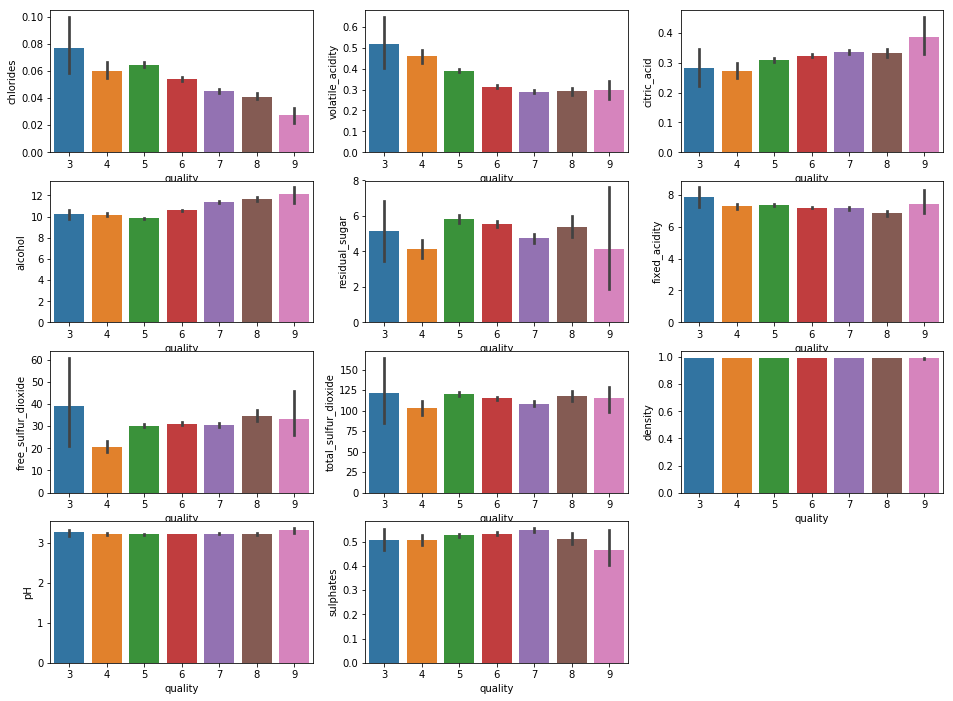

In [10]:
col_names = ['chlorides', 'volatile_acidity', 'citric_acid', 'alcohol', 'residual_sugar',
             'fixed_acidity', 'free_sulfur_dioxide',
             'total_sulfur_dioxide', 'density', 'pH', 'sulphates']
fig2, ax2 = plt.subplots(4, 3, figsize=(16,12))
id1 = 0
id2 = 0
for col in col_names:
    sns.barplot(x='quality', y=col, data=wine, ax=ax2[id1][id2])
    id2 += 1
    if id2 == 3:
        id2 = 0
        id1 += 1
fig2.delaxes(ax2[3][2])

1. Attributes **'chlorides', 'volatile acidity'** appear to be **decreasing with quality**. 
2. Whereas, attributes 'citric acid', 'alcohol' likely increasing with quality. 
3. The field 'residual sugar' is having an interesting non-linear relation to quality. 

However, these trends are NOT very strong. Remaining columns do not have any obvious patterns.

Though as standalone attributes, our features are not very strong quality predictors, when we combine more than one column we may see some useful patterns. 

Correlation matrix of our dataset attributes can reveal collinearity in data.

Printing the correlation between all variables.


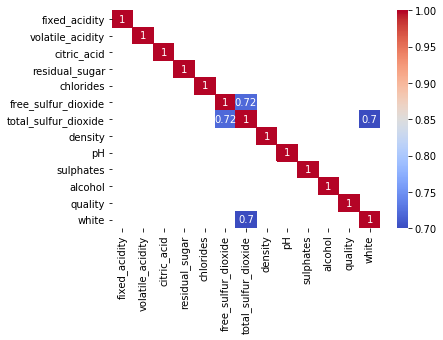

In [11]:
print('Printing the correlation between all variables.')
corr = wine.corr()
sns.heatmap(corr[(corr<=-0.7) | (corr>=0.7)], cmap='coolwarm', annot=True);

We see that Features **total_sulfur_dioxide** and **free_sulfur_dioxide** have a **positive correlation** of 0.72. Features **total_sulfur_dioxide** and **white** also have a **positive correlation** of 0.7.

## 4. Predictive Modeling using Linear Regression

When fitting a least squares line, we generally require
1. Linearity. The data should show a linear trend. If there is a nonlinear trend, an advanced regression method should be applied.
2. Nearly normal residuals. Generally, the residuals must be nearly normal. When this condition is found to be unreasonable, it is usually because of outliers or concerns about influential points.
3. Constant variability. The variability of points around the least squares line remains roughly constant.
4. Independent observations. 

In this section, our task is to check if the wine dataset meets the above 4 requirements are met.

Wine data will be split into two groups - train and test. 10% of data will be randomly selected as test data set while remaining 90% data will be selected as training data set. The training data will then be fitted under Linear Regression model. 

In [10]:
X = wine.drop('quality',axis=1)
y = wine['quality']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=100)

In [11]:
X_train_copy1 = X_train.copy()
X_test_copy1 = X_test.copy()

X_train_copy1 = sm.add_constant(X_train_copy1)
X_test_copy1 = sm.add_constant(X_test_copy1)

# train and predict Linear Regression model
model_reg = sm.OLS(y_train, X_train_copy1)
model_reg = model_reg.fit()
X_test_copy1['quality_pred'] = model_reg.predict(X_test_copy1)

# print(classification_report(y_test,y_pred_lr))

Now, the model is trained using Linear Regression, let us plot the distribution of Residuals and the scatter plot of predicted quality vs. actual quality.

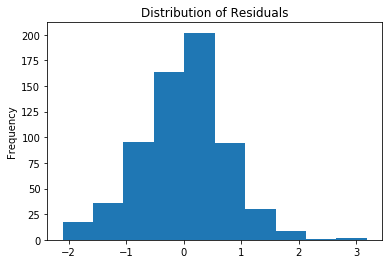

In [12]:
X_test_copy1['Residuals'] = X_test_copy1['quality_pred'] - y_test
X_test_copy1['Residuals'].plot.hist(title="Distribution of Residuals");

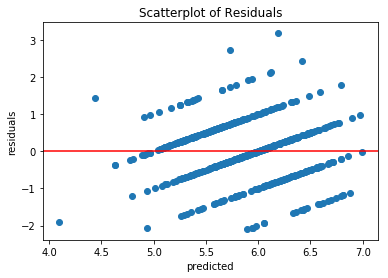

In [28]:
plt.scatter(X_test_copy1['quality_pred'], (X_test_copy1['Residuals']));
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Scatterplot of Residuals");
plt.xlabel("predicted");
plt.ylabel("residuals");

Below is the summary of the model.

In [16]:
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:30:52   Log-Likelihood:                -6464.3
No. Observations:                5847   AIC:                         1.295e+04
Df Residuals:                    5834   BIC:                         1.304e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  109.7634     16.374      6.704      0.000      77.665     141.862
fixed_acidity            0.0866      0.018      4.944      0.000       0.052       0.121
volatile_acidity        -1.4867      0.085    -17.431      0.000      -1.654      -1.319
citric_acid             -0.0278      0.084     -0.333      0.740      -0.192       0.136
residual_sugar           0.0630      0.007      9.535      0.000       0.050       0.076
chlorides               -0.7116      0.353     -2.013      0.044      -1.405      -0.019
free_sulfur_dioxide      0.0048      0.001      5.932      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -3.987      0.000      -0.002      -0.001
density               -108.8708     16.595     -6.561      0.000    -141.403     -76.339
pH                       0.5034      0.098      5.139      0.000       0.311       0.695
sulphates                0.6928      0.081      8.586      0.000       0.535       0.851
alcohol                  0.2131      0.021     10.274      0.000       0.172       0.254
white                   -0.3689      0.062     -5.986      0.000      -0.490      -0.248
==============================================================================
Omnibus:                      130.269   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.596
Skew:                           0.022   Prob(JB):                     2.91e-64
Kurtosis:                       4.095   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next, we are printing the $R^2$ of the model on Test.

In [17]:
print('Model Score on Test Set: {:.2f}'.format(r2_score(y_test, X_test_copy1['quality_pred'])))

Model Score on Test Set: 0.31


Our observations about the dataset is below:
1. There is a weak Linearity amongst response and independent variables.
2. Our dataset is small and has only 6497 samples. Hence, we can safely assume that observations are independent.
3. The distribution of the residuals is normal. 
4. The scatter plot of the fitted values vs residuals does not show constant variability because residuals are not "bouncing randomly" around the 0 line. This confirms our assumption that linear relationship is not reasonable.

However, the model has ${R^2}$ of 0.3 on test data set, which is poor. This is further corroborated by very high AIC and BIC score and very low Log-Likelihood. But, the good news is that Prob (F-statistic) tells us that the model is significant and the p-values of all the coefficients except citric_acid are statistically significant at the 95% confidence Level.

Our next goal is to try to improve $R^2$ by building different models.

### 4.1.  Fine Tuning by backward elimination

The first technique we are employing is called 'Backward Elimination'.<br>
Backward elimination starts with the model that includes all potential predictor variables. Variables are eliminated one-at-a-time from the model until we cannot improve the adjusted $R^2$.

In [18]:
def drop_and_train(col):

    X_train_copy2 = X_train.drop(col,axis=1)
    X_test_copy2 = X_test.drop(col,axis=1)
    
    X_train_copy2 = sm.add_constant(X_train_copy2)
    X_test_copy2 = sm.add_constant(X_test_copy2)
        
    # train and predict Linear Regression model
    model2_reg = sm.OLS(y_train, X_train_copy2)
    model2_reg = model2_reg.fit()
           
    return round(r2_score(y_test, model2_reg.predict(X_test_copy2)),2), round(model2_reg.aic,2), round(model2_reg.bic,2), round(model2_reg.fvalue,2)

pt = PrettyTable(['model with removed feature','rsquared on test','aic','bic','fvalue'])
for col in [i for i in list(wine.columns) if i != 'quality']:
    r,a,b,f = drop_and_train([col])
    pt.add_row([col, r, a, b, f])
    
    
print('Results of backward elimination')
print(pt)

Results of backward elimination
+----------------------------+------------------+----------+----------+--------+
| model with removed feature | rsquared on test |   aic    |   bic    | fvalue |
+----------------------------+------------------+----------+----------+--------+
|       fixed_acidity        |       0.3        | 12977.12 | 13057.2  | 218.65 |
|      volatile_acidity      |       0.27       | 13249.51 | 13329.6  | 184.55 |
|        citric_acid         |       0.31       | 12952.78 | 13032.87 | 221.77 |
|       residual_sugar       |       0.29       | 13043.08 | 13123.17 | 210.25 |
|         chlorides          |       0.31       | 12956.73 | 13036.81 | 221.27 |
|    free_sulfur_dioxide     |       0.3        | 12987.83 | 13067.91 | 217.28 |
|    total_sulfur_dioxide    |       0.31       | 12968.58 | 13048.66 | 219.74 |
|          density           |       0.3        | 12995.65 | 13075.73 | 216.28 |
|             pH             |       0.31       | 12979.08 | 13059.16 | 218.4

The above code builds several models each by removing one independent variable and training using the rest of the variables and lists the model's $R^2$ on Test set.  
From the table above, we see that none of the models have $R^2$, that is considerably better than the first model. Hence, the backward elimination has NOT helped us much.

Our next technique is to use a different method to improvise the model. 

### 4.2 Fine Tuning by backward elimination using p-value

This is our second way to build a better model than the previous two. <br> Here we take the help of p-value of the basic model(also called as "largest model"  because this model is trained using all independent variables).

The p-value may be used as an alternative to adjusted $R^2$ for model selection. In backward elimination, we would identify the predictor corresponding to the largest p-value. If the p-value is above the significance level, usually α = 0.05, then we would drop that variable, refit the model, and repeat the process. If the largest p-value is less than α = 0.05, then we would not eliminate any predictors and the current model would be our
best-fitting model.<br><br>
In our case, we will be keeping the OLS summary of the largest model as reference, we see that most of the variables have p-value 0. But, **citric_acid** has p-value 0.625 which is greater than 0.05 and also is **chlorides** with p-value 0.152. Hence, we will be training a new model without these 2 variables. 

In [19]:
pt = PrettyTable(['model with removed features','rsquared','aic','bic','fvalue'])
r,a,b,f = drop_and_train(['citric_acid', 'chlorides'])
pt.add_row([['citric_acid', 'chlorides'], r, a, b, f])

print(pt)

+------------------------------+----------+----------+----------+--------+
| model with removed features  | rsquared |   aic    |   bic    | fvalue |
+------------------------------+----------+----------+----------+--------+
| ['citric_acid', 'chlorides'] |   0.31   | 12955.21 | 13028.62 | 243.37 |
+------------------------------+----------+----------+----------+--------+


The above code returned $R^2$ on Test set of the model that was trained without citric_acid and chlorides. Notice that $R^2$ of the model is NOT much better than the any of the models obtained through backward elimination technique. This proves that backward elimination using p-value has NOT helped us much. 

### 4.3 Fine Tuning by transforming independent variables

Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. Some modeling techniques requires normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness. For right skewed distribution, we take square / cube root or logarithm of variable and for left skewed, we take square / cube or exponential of variables.
These transformations may improve the prediction and Log and square root transformations are one of the commonly used transformation techniques used in these situations.

To visualize the distributions of variables, we will be plotting their histograms first. Then, do the necessary transformations and train a model using these transformed variables.

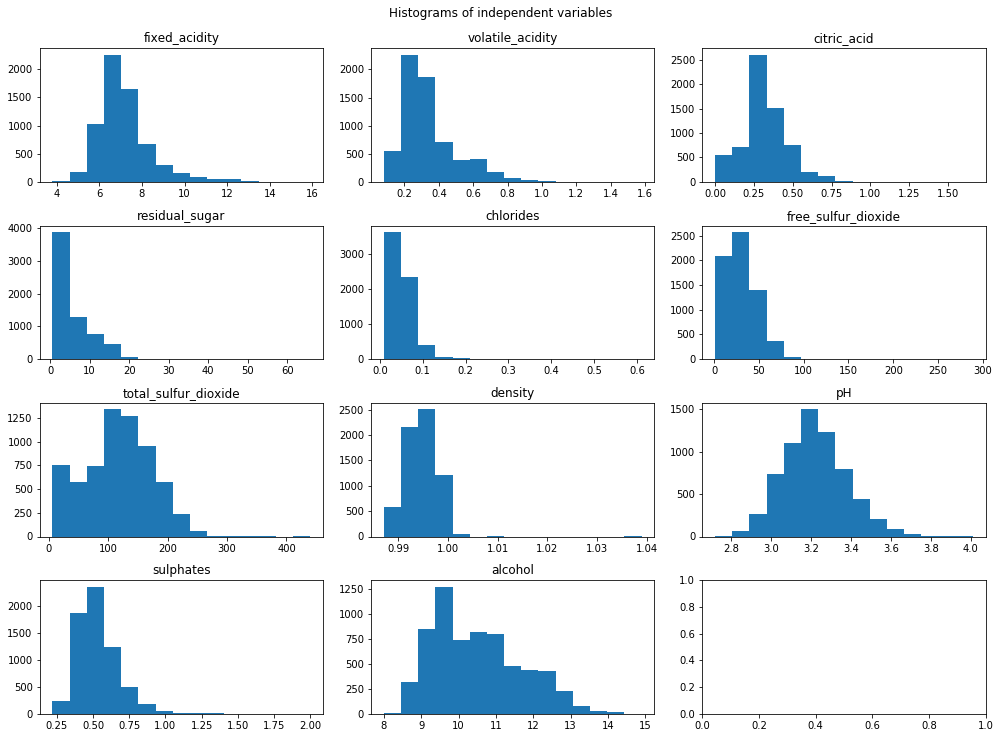

In [20]:

fig, axs = plt.subplots(4,3, figsize=(14,10));
fig.suptitle('Histograms of independent variables', y=1.02);
x,y = 0, 0
for col in [i for i in list(wine.columns) if (i != 'quality' and i != 'white')]:

    axs[x,y].hist(wine[col], bins = 15);
    axs[x,y].title.set_text(col);
    
    if y == 2: 
        x += 1
        y = 0
    else:
        y += 1
    
        
fig.tight_layout();

The above figure contains histograms of all independent variables. The variables that need to be transformed are chlorides, free_sulfur_dioxide, volatile_acidity and sulphates. 
free_sulfur_dioxide variable was transformed using np.sqrt and other three variables are log-transformed. Let us display their histograms to confirm.

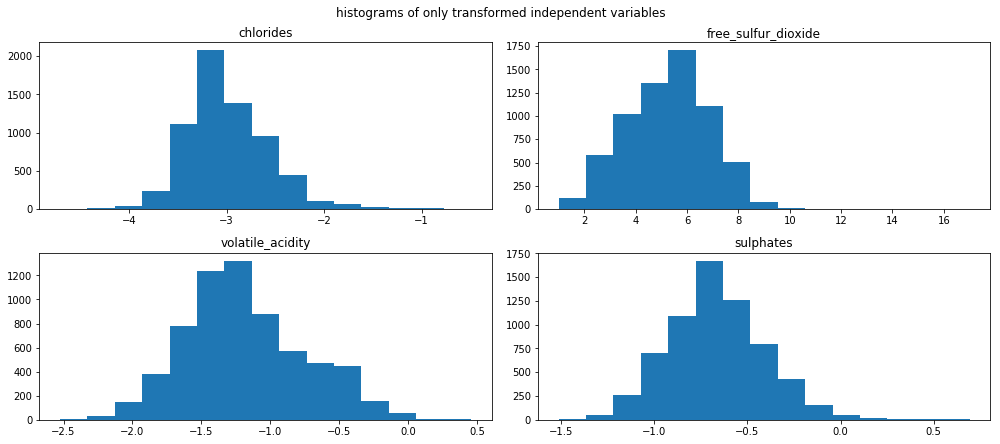

In [45]:
fig, axs = plt.subplots(2,2, figsize=(14,6));
fig.suptitle('histograms of only transformed independent variables', y=1.02);
x,y = 0, 0
for col in [i for i in ['chlorides', 'free_sulfur_dioxide', 'volatile_acidity', 'sulphates']]:

    if col=='free_sulfur_dioxide':
        axs[x,y].hist(np.sqrt(wine[col]), bins=15);
       
    else:
        axs[x,y].hist(np.log(wine[col]), bins=15);
    
    axs[x,y].title.set_text(col);
    
    if y == 1: 
        x += 1
        y = 0
    else:
        y += 1
    
        
fig.tight_layout();   

Next, we are training a model using these transformed variables and printing the OLS Summary.

In [15]:

X_train_copy3 = X_train.copy()
X_test_copy3 = X_test.copy()

X_train_copy3 = sm.add_constant(X_train_copy3)
X_test_copy3 = sm.add_constant(X_test_copy3)

X_train_copy3.chlorides = np.log(X_train_copy3.chlorides)
X_train_copy3.free_sulfur_dioxide = np.sqrt(X_train_copy3.free_sulfur_dioxide)
X_train_copy3.volatile_acidity = np.log(X_train_copy3.volatile_acidity)
X_train_copy3.sulphates = np.log(X_train_copy3.sulphates)

X_test_copy3.chlorides = np.log(X_test_copy3.chlorides)
X_test_copy3.free_sulfur_dioxide = np.sqrt(X_test_copy3.free_sulfur_dioxide)
X_test_copy3.volatile_acidity = np.log(X_test_copy3.volatile_acidity)
X_test_copy3.sulphates = np.log(X_test_copy3.sulphates)

# train and predict Linear Regression model
model3_reg = sm.OLS(y_train, X_train_copy3)
model3_reg = model3_reg.fit()

model3_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     210.9
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:46:44   Log-Likelihood:                -6432.2
No. Observations:                5847   AIC:                         1.289e+04
Df Residuals:                    5834   BIC:                         1.298e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   96.7385     16.722      5.785      0.000      63.958     129.519
fixed_acidity            0.0796      0.018      4.535      0.000       0.045       0.114
volatile_acidity        -0.5308      0.030    -17.406      0.000      -0.591      -0.471
citric_acid              0.0423      0.081      0.520      0.603      -0.117       0.202
residual_sugar           0.0586      0.007      8.734      0.000       0.045       0.072
chlorides               -0.0798      0.034     -2.333      0.020      -0.147      -0.013
free_sulfur_dioxide      0.0814      0.009      8.872      0.000       0.063       0.099
total_sulfur_dioxide    -0.0018      0.000     -5.314      0.000      -0.003      -0.001
density                -96.5228     16.899     -5.712      0.000    -129.651     -63.395
pH                       0.3860      0.098      3.950      0.000       0.194       0.578
sulphates                0.4081      0.046      8.805      0.000       0.317       0.499
alcohol                  0.2290      0.021     11.081      0.000       0.189       0.270
white                   -0.3597      0.062     -5.811      0.000      -0.481      -0.238
==============================================================================
Omnibus:                      120.228   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.337
Skew:                           0.036   Prob(JB):                     7.99e-57
Kurtosis:                       4.027   Cond. No.                     3.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
print('Model Score on Test Set: {:.2f}'.format(r2_score(y_test, model3_reg.predict(X_test_copy3))))


Model Score on Test Set: 0.33


### 4.4 Model Selection using OLS Summary
In this section, our goal is to compare the statistics of the largest model with model obtained using transformed variables and decide which model is better. We see that the largest model has a lesser $R^2$ than the other. Even though AIC and BIC of both models are nearly same, the model with transformed variables has more statistically significant coefficients than the largest model because, almost all of the coefficients have p-value<0.05 and the p-values of citric_acid and chlorides are much better.

Hence, our claim is that the model that used transformed variables may perform better on unseen data.

### 4.5 Deciding Further Steps

The model that was trained using these transformed variables has $R^2$ -0.32 on Test which is not a big improvement. 
Hence, we need to find yet another technique to try to improve the model.<br>
Before proceeding to our next technique let us first analyze the Leverage plot and Influence plot to check the influence of outliers. 

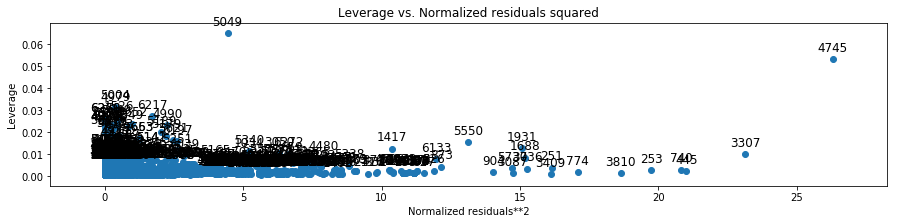

In [17]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(model_reg, ax=ax)

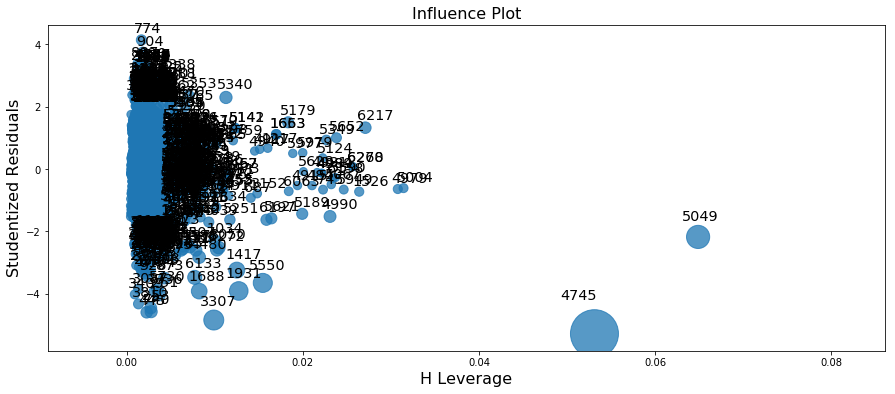

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(model_reg, ax=ax)

From the above Influence and residual leverage plot we feel that if we treat the outliers by Normalizing data, we may be able to improve $R^2$. 

Also, let us first confirm that the features are having different value ranges because, when dataset has variables that have different value ranges, often, the loss function tend to give 'less importance' to columns with smaller value ranges. Data normalization is a technique to alleviate these undesirable effects and may help us improve $R^2$.

In [19]:
wine[['chlorides', 'density', 'citric_acid', 'volatile_acidity', 'sulphates', 'pH', 'alcohol', 'fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']].describe().loc[['min','max']]

,chlorides,density,citric_acid,volatile_acidity,sulphates,pH,alcohol,fixed_acidity,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide
min,0.009,0.98711,0.00,0.08,0.22,2.72,8.0,3.8,0.6,1.0,6.0
max,0.611,1.03898,1.66,1.58,2.00,4.01,14.9,15.9,65.8,289.0,440.0


We can say 'chlorides', 'density', 'citric_acid', 'volatile_acidity', 'sulphates' have low dynamic range. 'pH', 'alcohol', 'fixed acidity', 'residual sugar' have medium range and 'free sulfur dioxide', 'total sulfur dioxide' have very high ranges.

There are many ways one can normalize this data. We are going for most frequently used StandardScaler() which standardizes features by removing the mean and scaling to unit variance and then train.

In [20]:
X_train_copy4 = X_train.copy()
X_test_copy4 = X_test.copy()
scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train_copy4)
X_test_norm = scaler.transform(X_test_copy4)

## 5. Predictive Modeling using Ridge Regression with Regularization by scikit learn


Linear regression works by estimating coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, the model starts modeling intricate relations to estimate the output and ends up over fitting to the particular training data. Such a model will not generalize well on the unseen data. In our case, the intercept and density variables have coefficients that are too high and low respectively. So, putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity. We do this using "Regularization" which penalizes large coefficients. 

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. In Ridge Regression, the OLS loss function is augmented in such a way that we not only minimize the sum of squared residuals, but also penalize the size of parameter estimates, in order to shrink them towards zero. This is mathematically written as

<center>
$ {\displaystyle {\hat {\boldsymbol {\beta }}}={\underset {\boldsymbol {\beta }}{\operatorname {arg\,min} }}\,S({\boldsymbol {\beta }})} +  {\displaystyle {\boldsymbol {\alpha }}}{\displaystyle {\boldsymbol {\beta }}}^2 $  </center>

 
Notice that penalty parameter is the square of the magnitude of the coefficients and $ \alpha $ is the parameter we need to select. So by changing the values of alpha, we are basically controlling the penalty term. Higher the values of $ \alpha $, bigger is the penalty and therefore the magnitude of coefficients are reduced.

In scikit-learn, a ridge regression model is constructed by using the Ridge class. We will be instantiating the Ridge Regression model with an alpha value of 0.01 after we transform/standardize the data. 

In [21]:
# train and predict Ridge Regression model
model_ridge = Ridge(alpha=0.001, copy_X=False, fit_intercept=True, normalize=False,   tol=0.001)
model_ridge.fit(X_train_norm, y_train) 


Ridge(alpha=0.001, copy_X=False, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
print('Model Score on Test Set: {:.2f}'.format(r2_score(y_test, model_ridge.predict(X_test_norm))))

Model Score on Test Set: 0.31


In [26]:
print("printing the ridge model coefficients\n")
print(model_ridge.coef_)

printing the ridge model coefficients

[ 0.1122537  -0.24524274 -0.0040585   0.29663793 -0.02491713  0.0846123
 -0.07655952 -0.32036124  0.08086912  0.1031732   0.25394175 -0.15911866]


The displayed $R^2$ of the model is on Test set and is not an improvement. 
But, it is interesting to notice that all the model coefficients are shrunk towards 0 and none of them are extremely negative or extremely positive like in the case of conventional OLS, thereby reducing the complexity of the model.

We also noticed a warning message  - " A large Cond. No. indicates strong multicollinearity or other numerical problems." in the OLS Summary of both the largest model and the model that transformed variables.  Hence, we will be fitting a more sophisticated algorithm such as Support Vector Machine to improve the $R^2$. This is covered in the next section.

## 6. Predictive Modeling using Support Vector Regression
The code and comments for this section is available in 4. 3251_017_Team6_Wine_SVR.ipynb file.

## 7. Conclusion:

In this notebook, we have demonstrated how Regression can be used to build a machine learning model to predict the wine quality. We analyzed UCI's Wine Quality Data Set Dataset to predict wine quality as a continuous value. 

10% of data was randomly picked as test data and 90% of data was randomly picked as train data. Predictive models were built using "Linear Regression", "Ridge Regression with Regularization" and "Support Vector Regression" approaches. Detailed study of model summary revealed that model is slightly complex. So, we looked at ways of normalizing our data and impose regularization which gave a boost to $R^2$. We believe that models that used Regularization with Ridge Regression and SVR may perform better on unseen data as this are simpler than other linear models. 

We have also shown that a carefully selected GridSearch using Support Vector Regression and Standardized data improved the $R^2$ from 0.32 to 0.44.